# To evaluate whether ICA components can be recovered in randomized data, each subject timeseries where spatial randomized (mixed the voxel coordinates) and dual regression was conducted on both real and random data

### When looking at single subjects, the components in the shuffled data are largely noise, but do express some part of the component. For each IC, the first map is the template, the second the real data, adn the third the shuffled data.

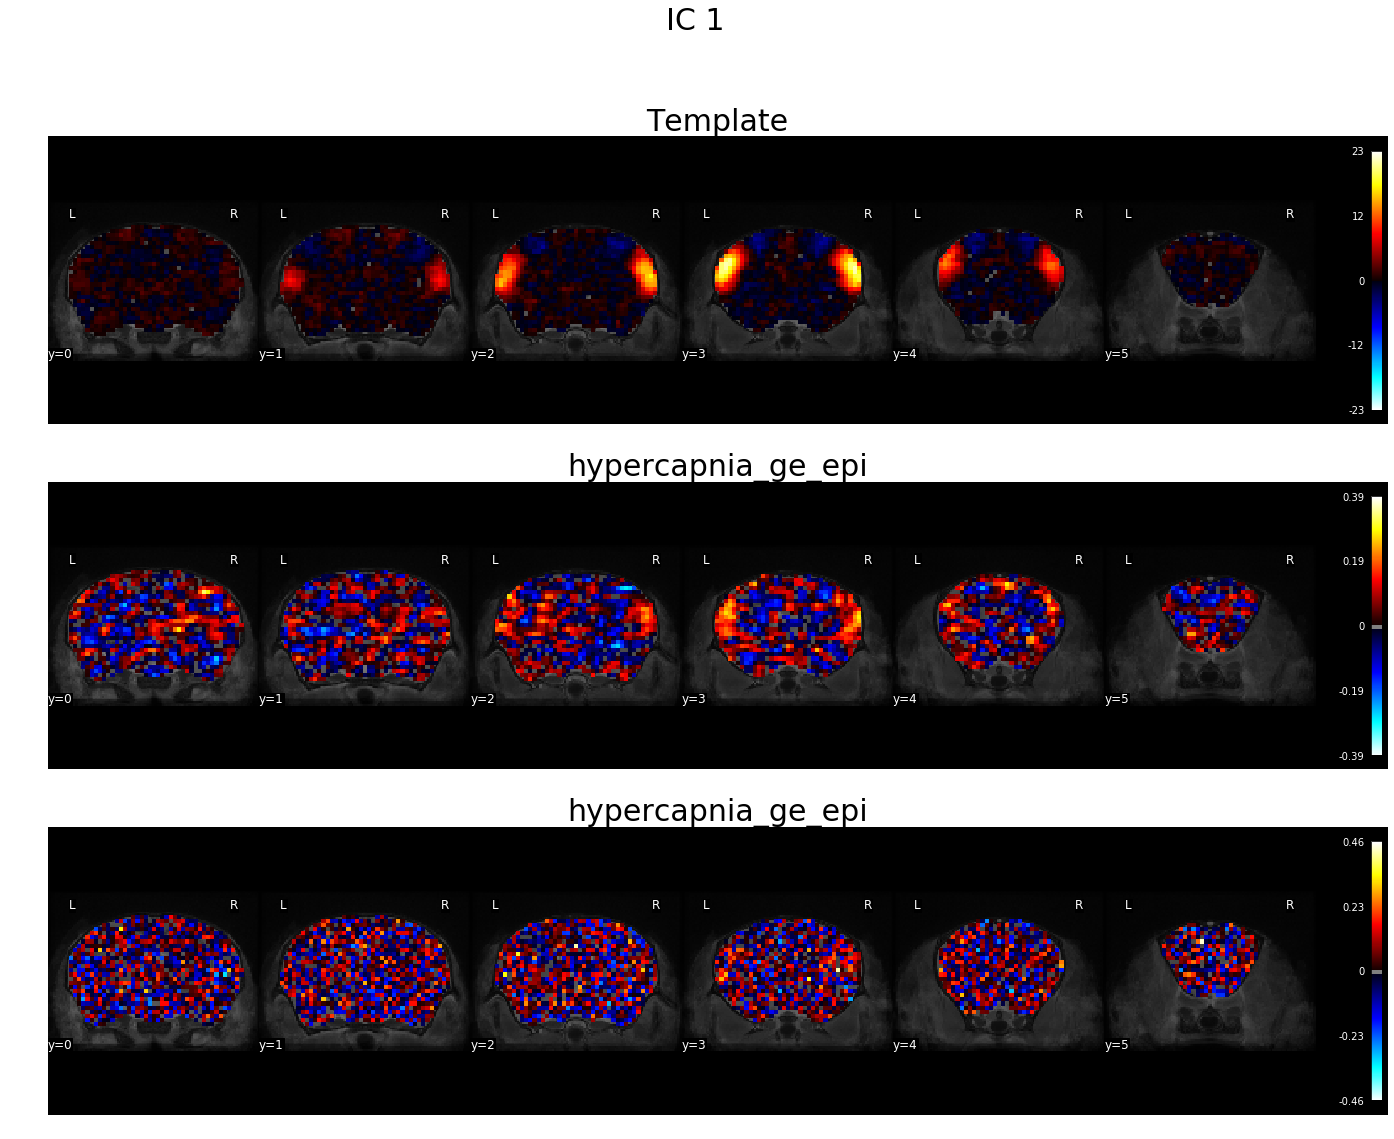

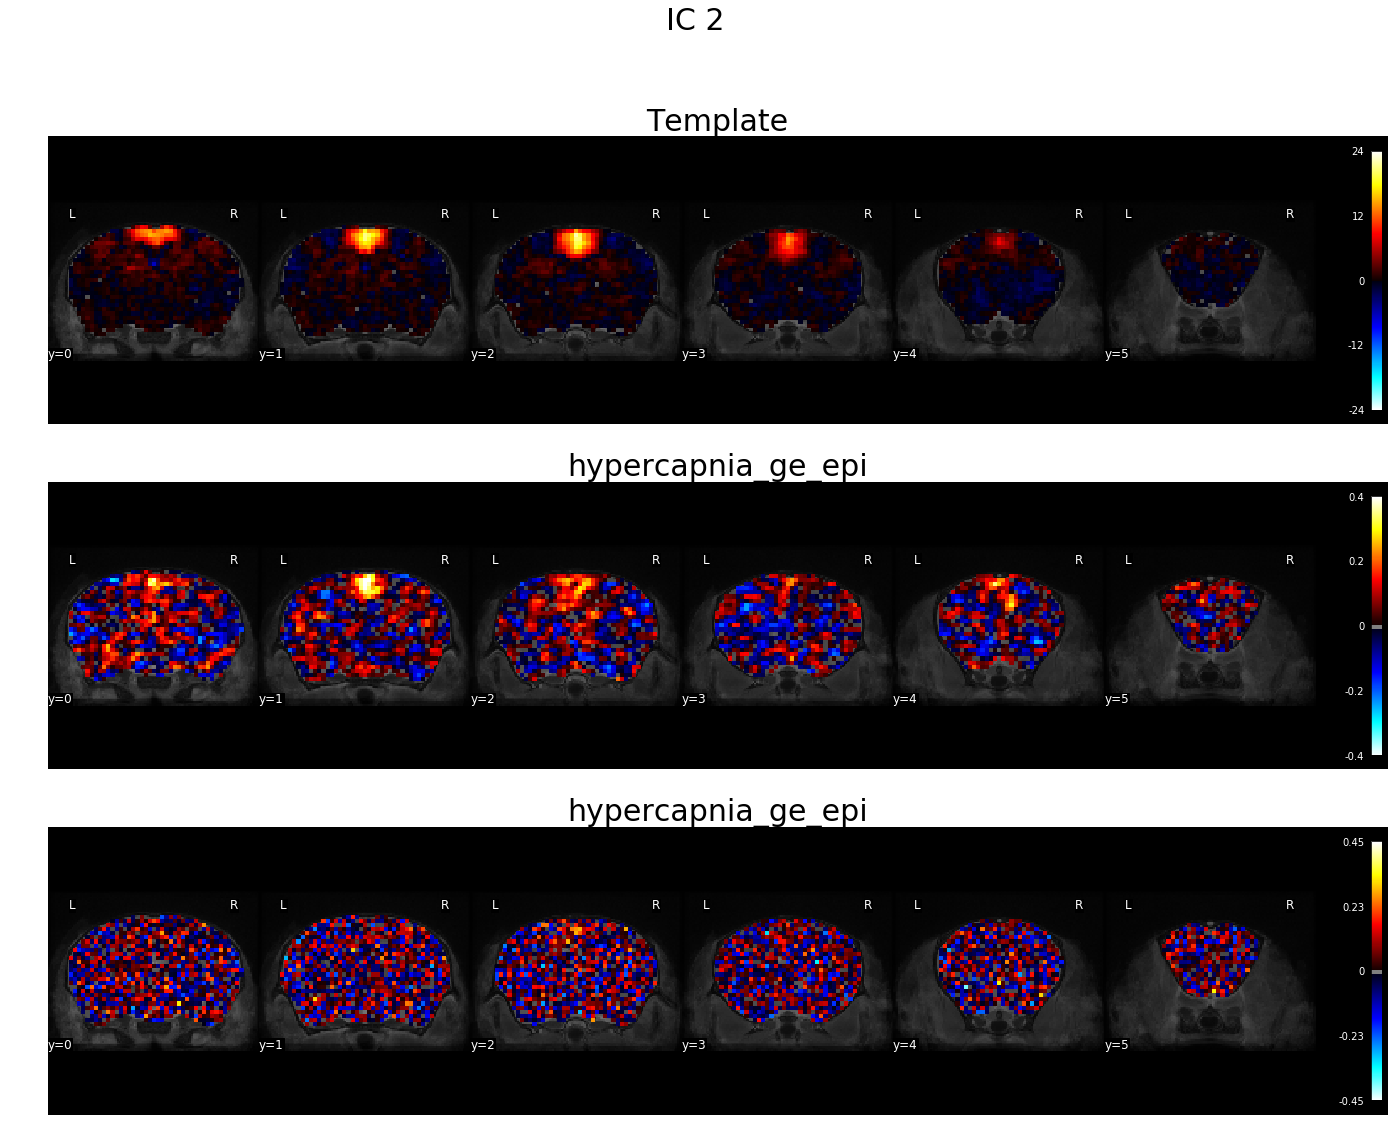

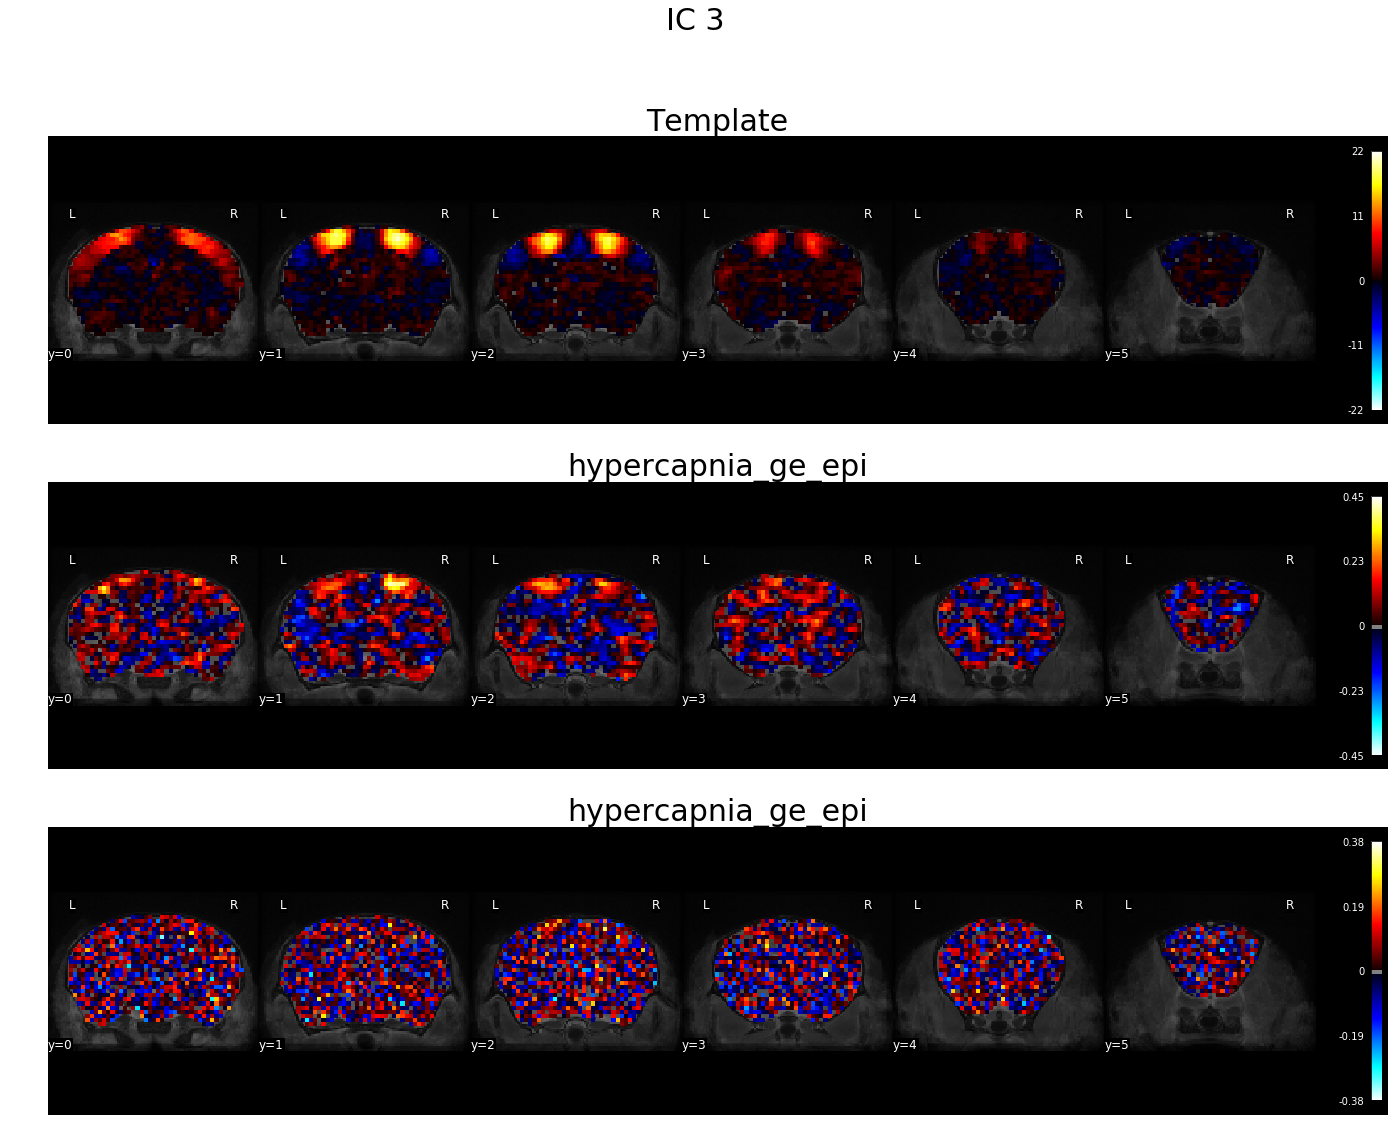

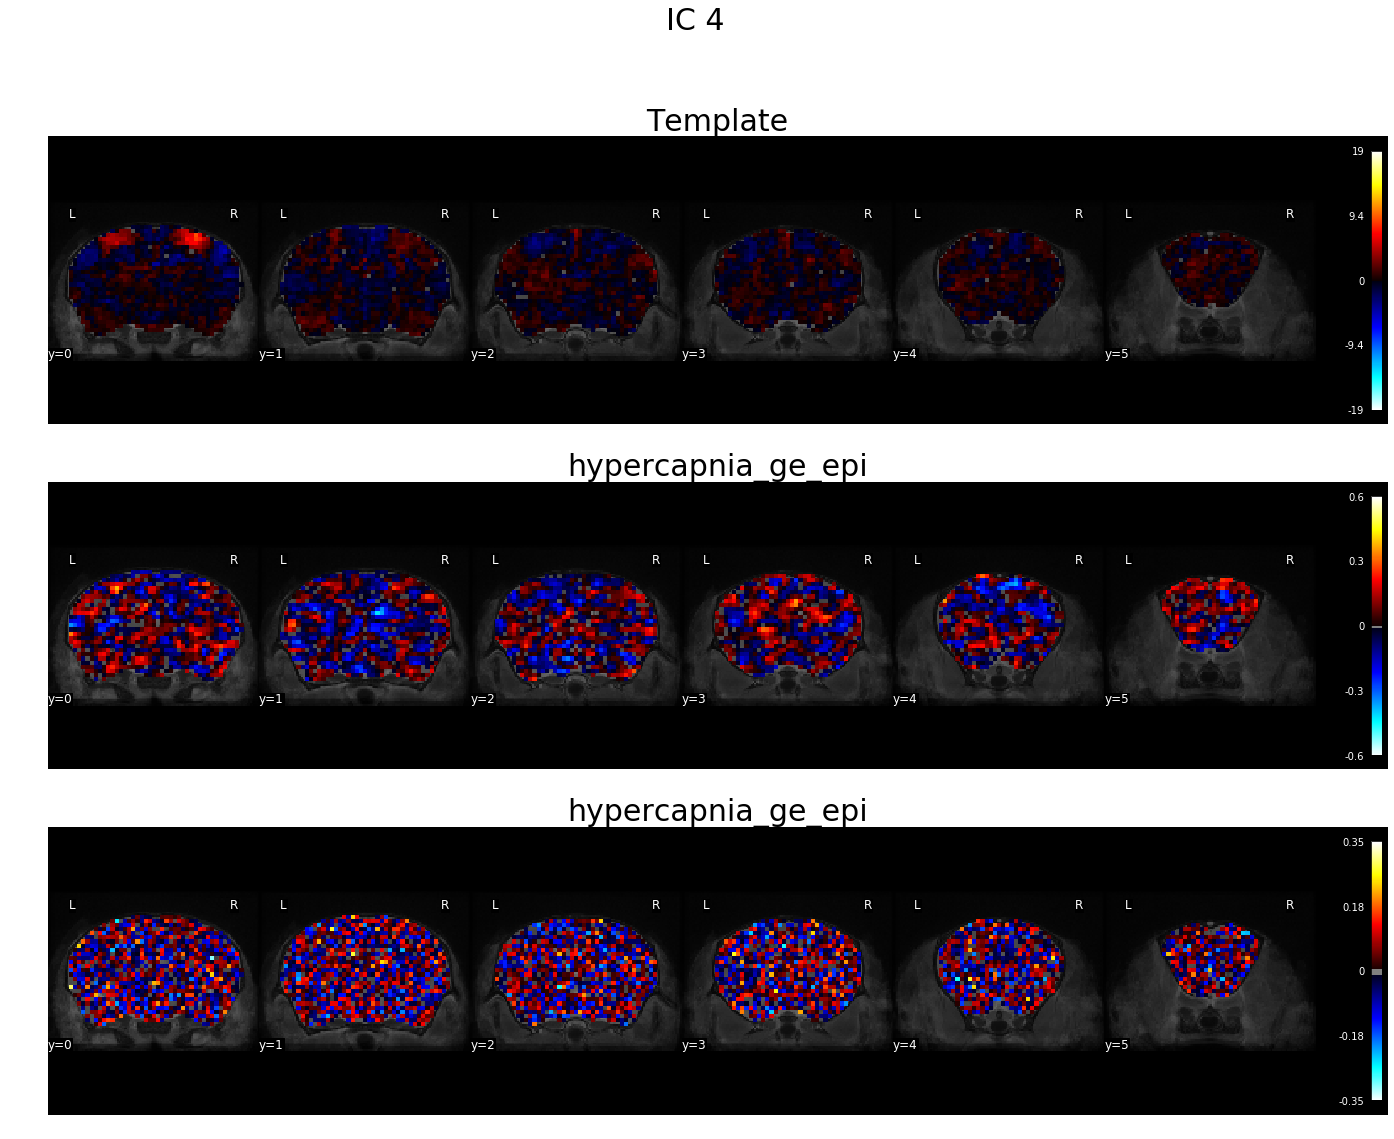

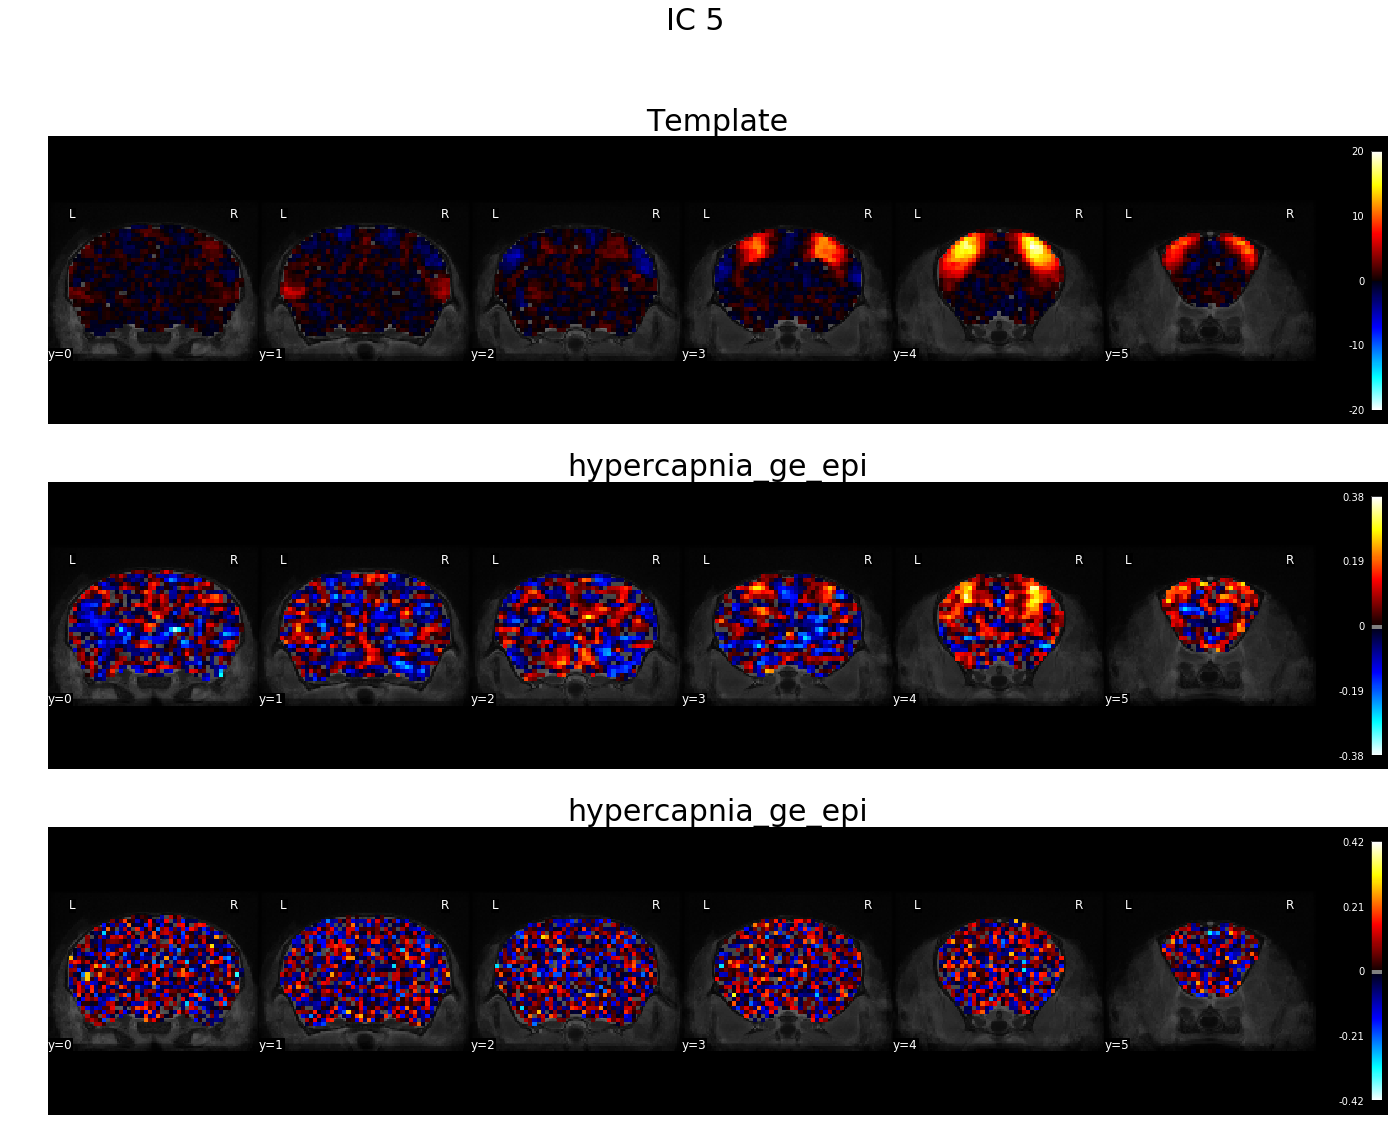

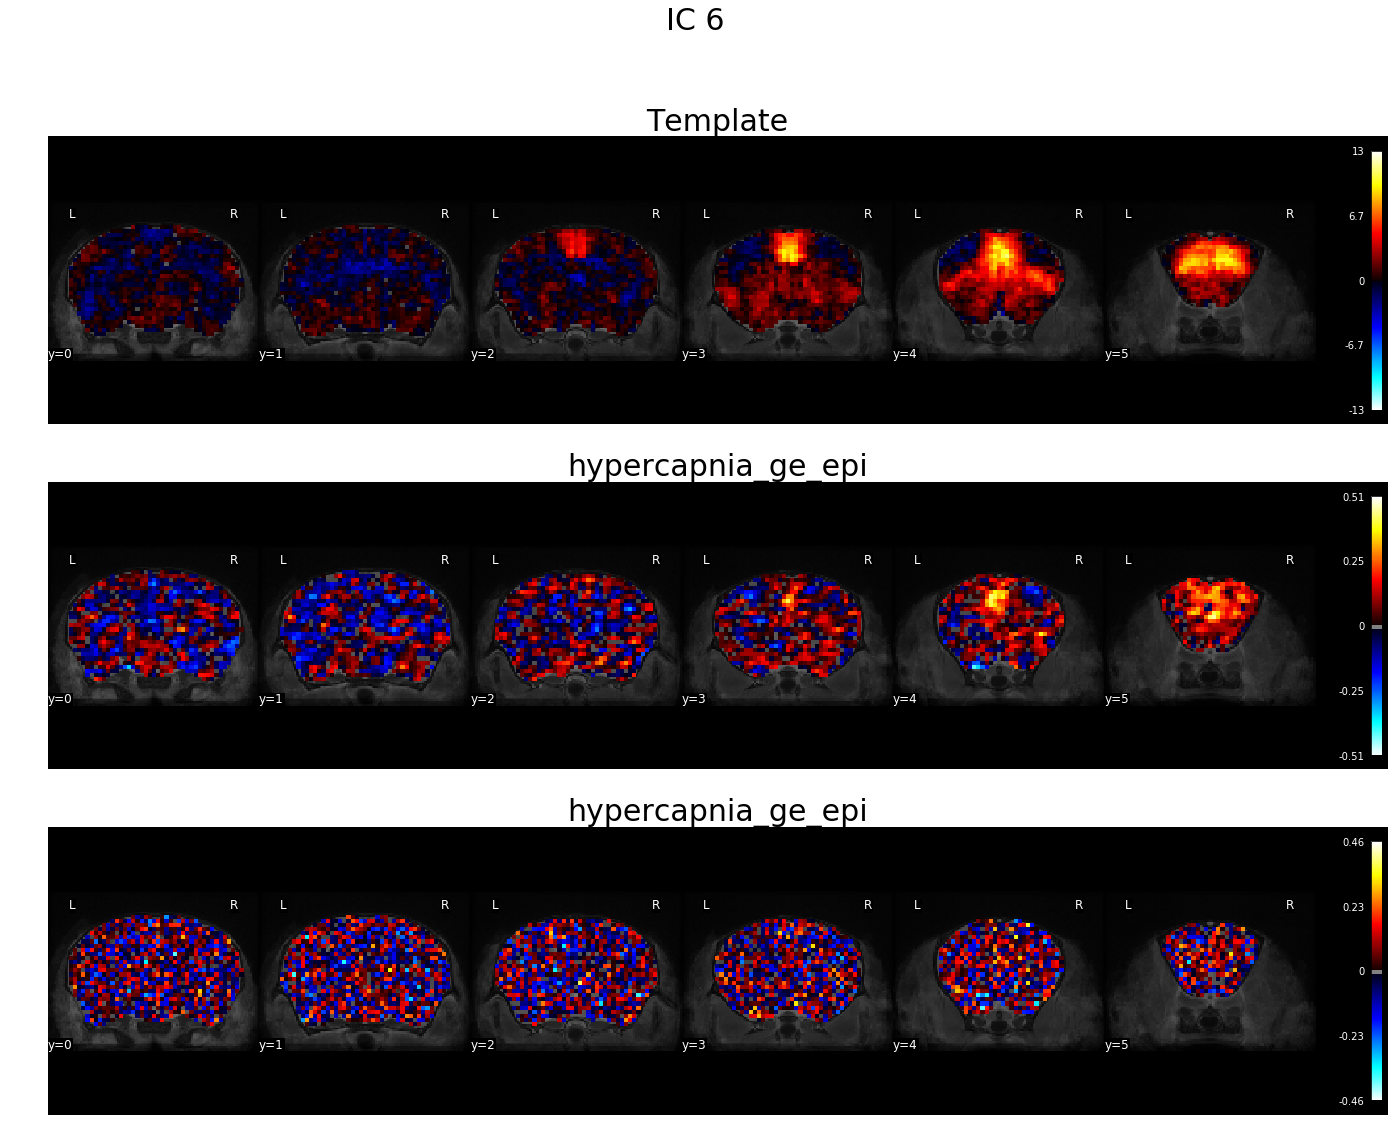

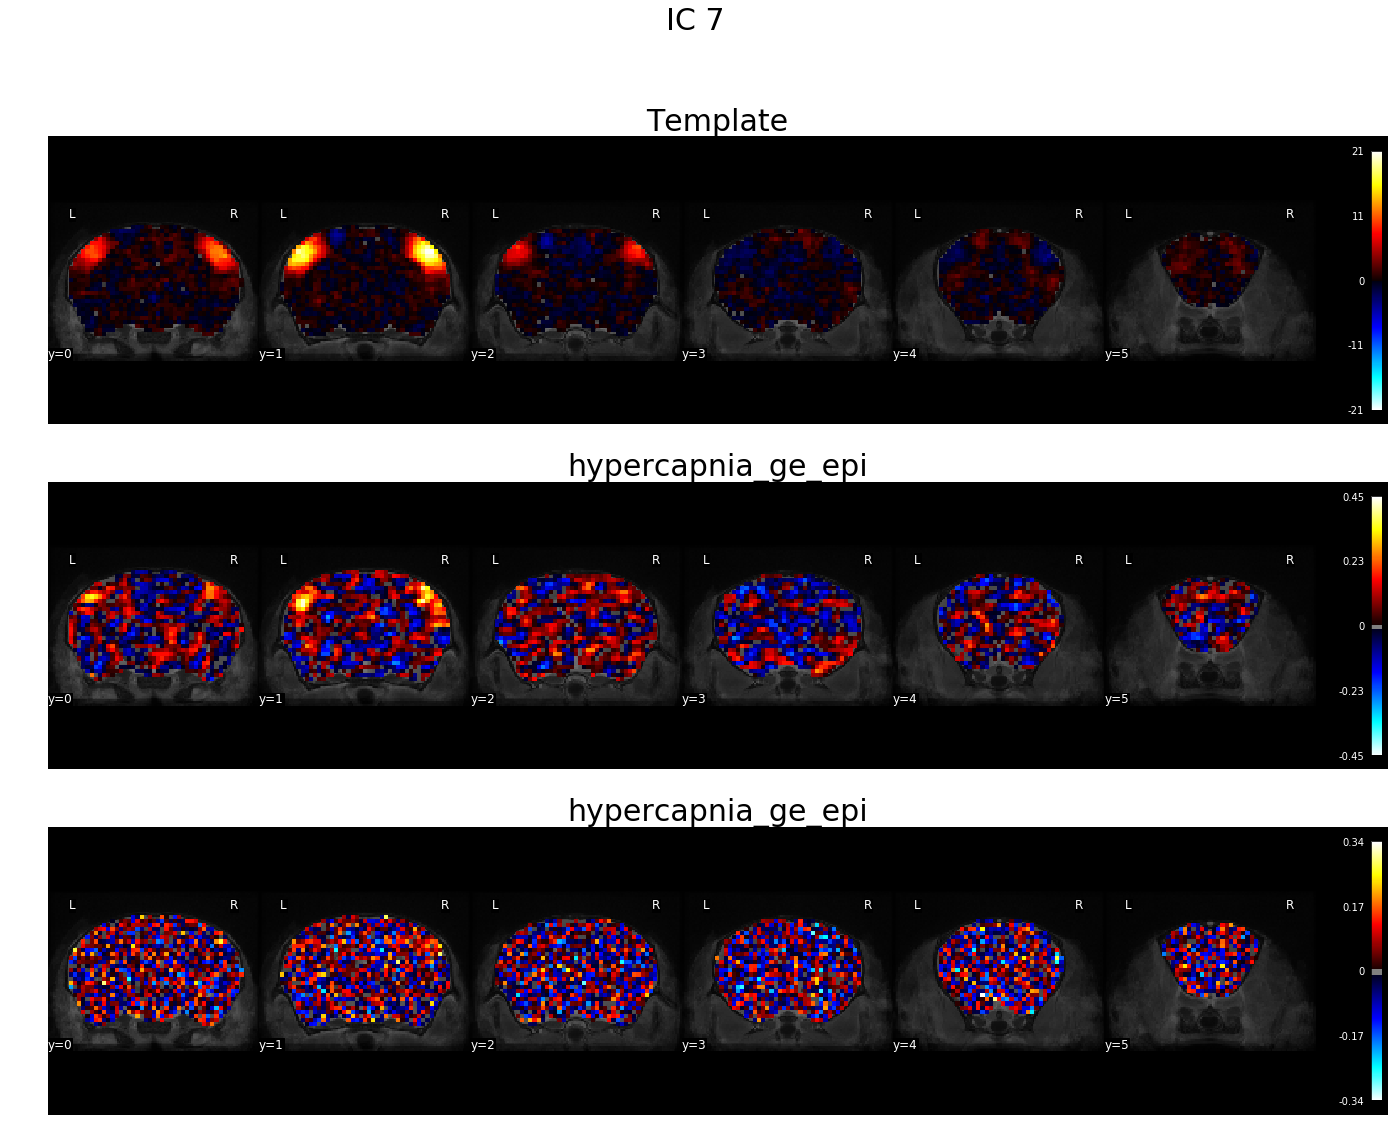

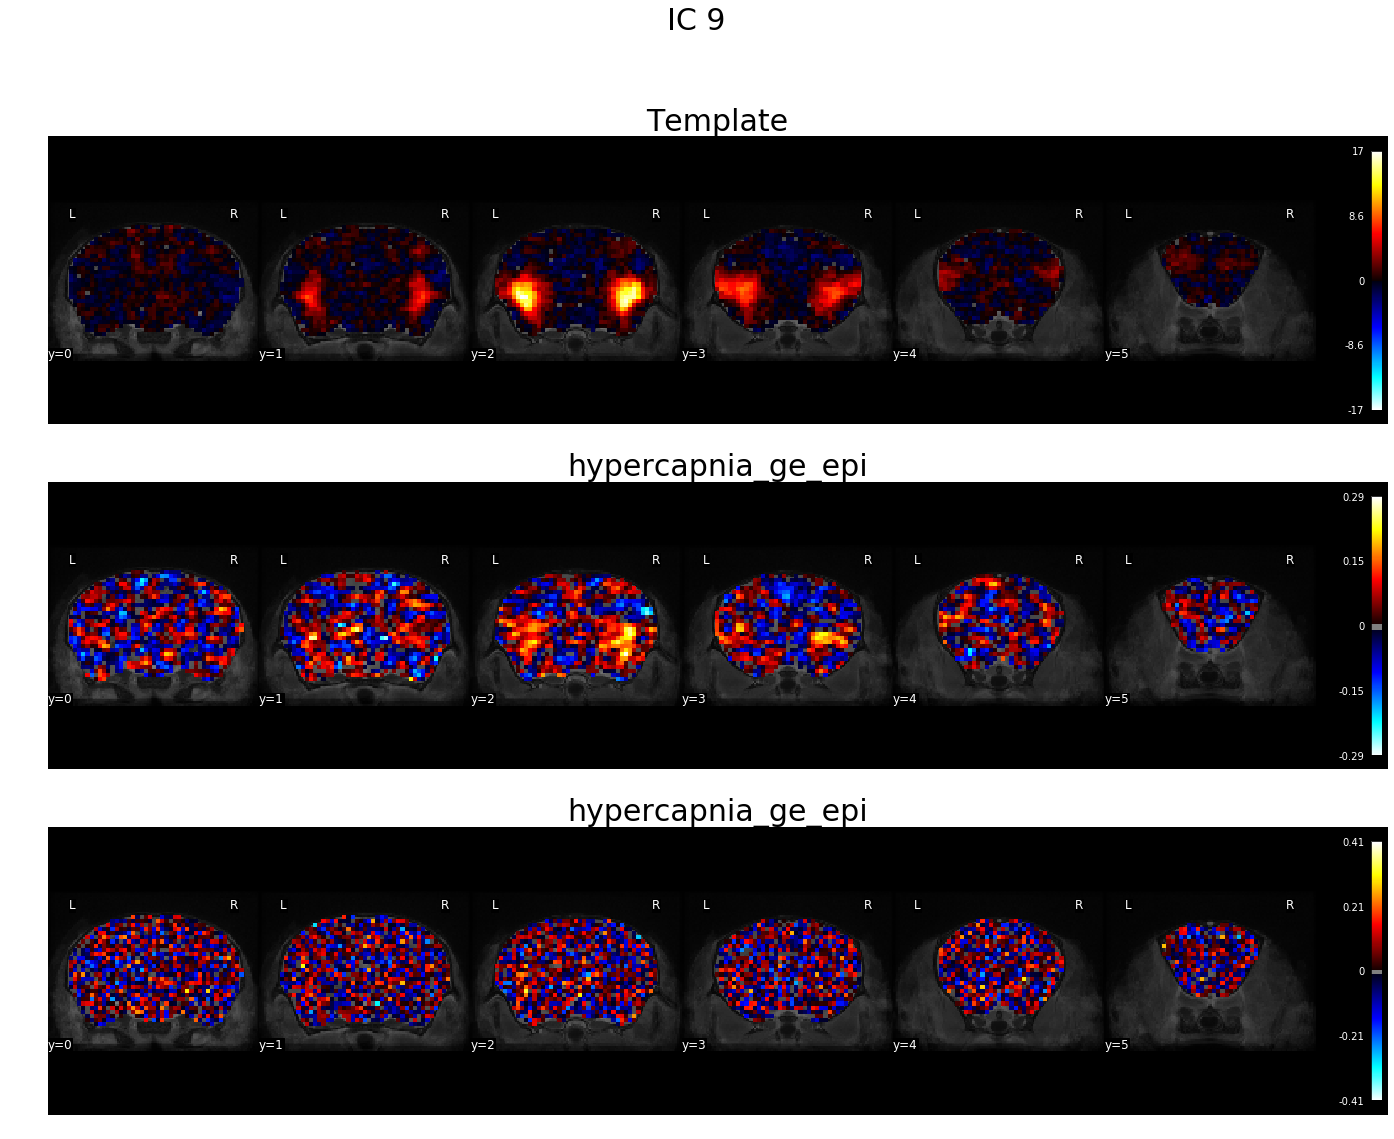

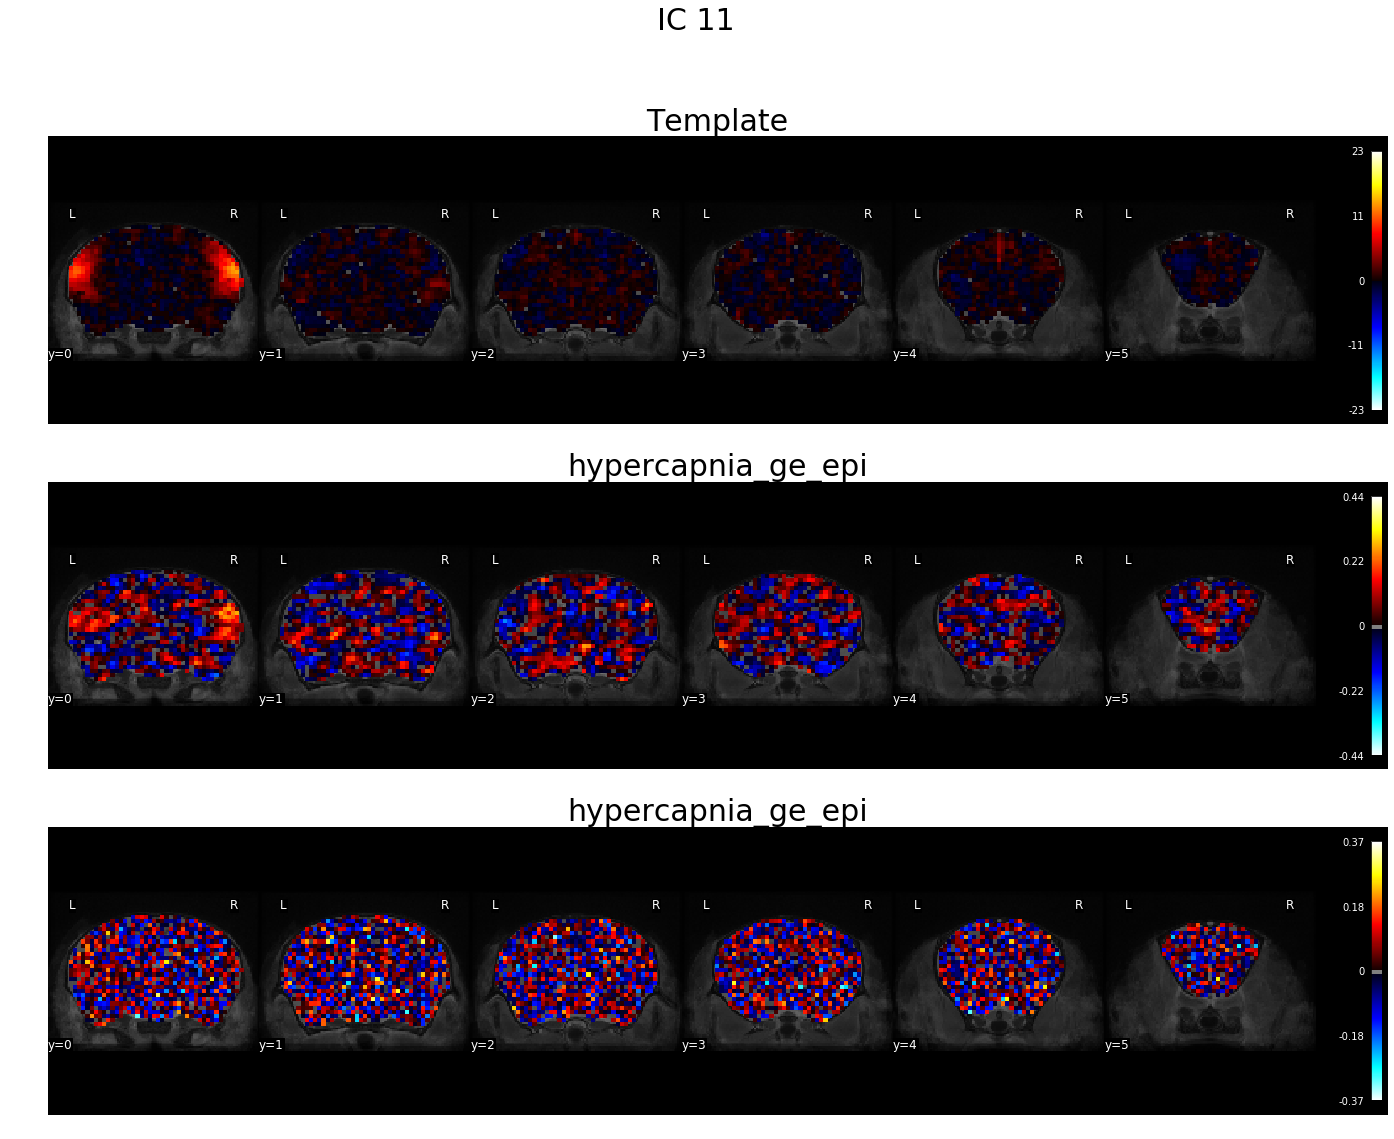

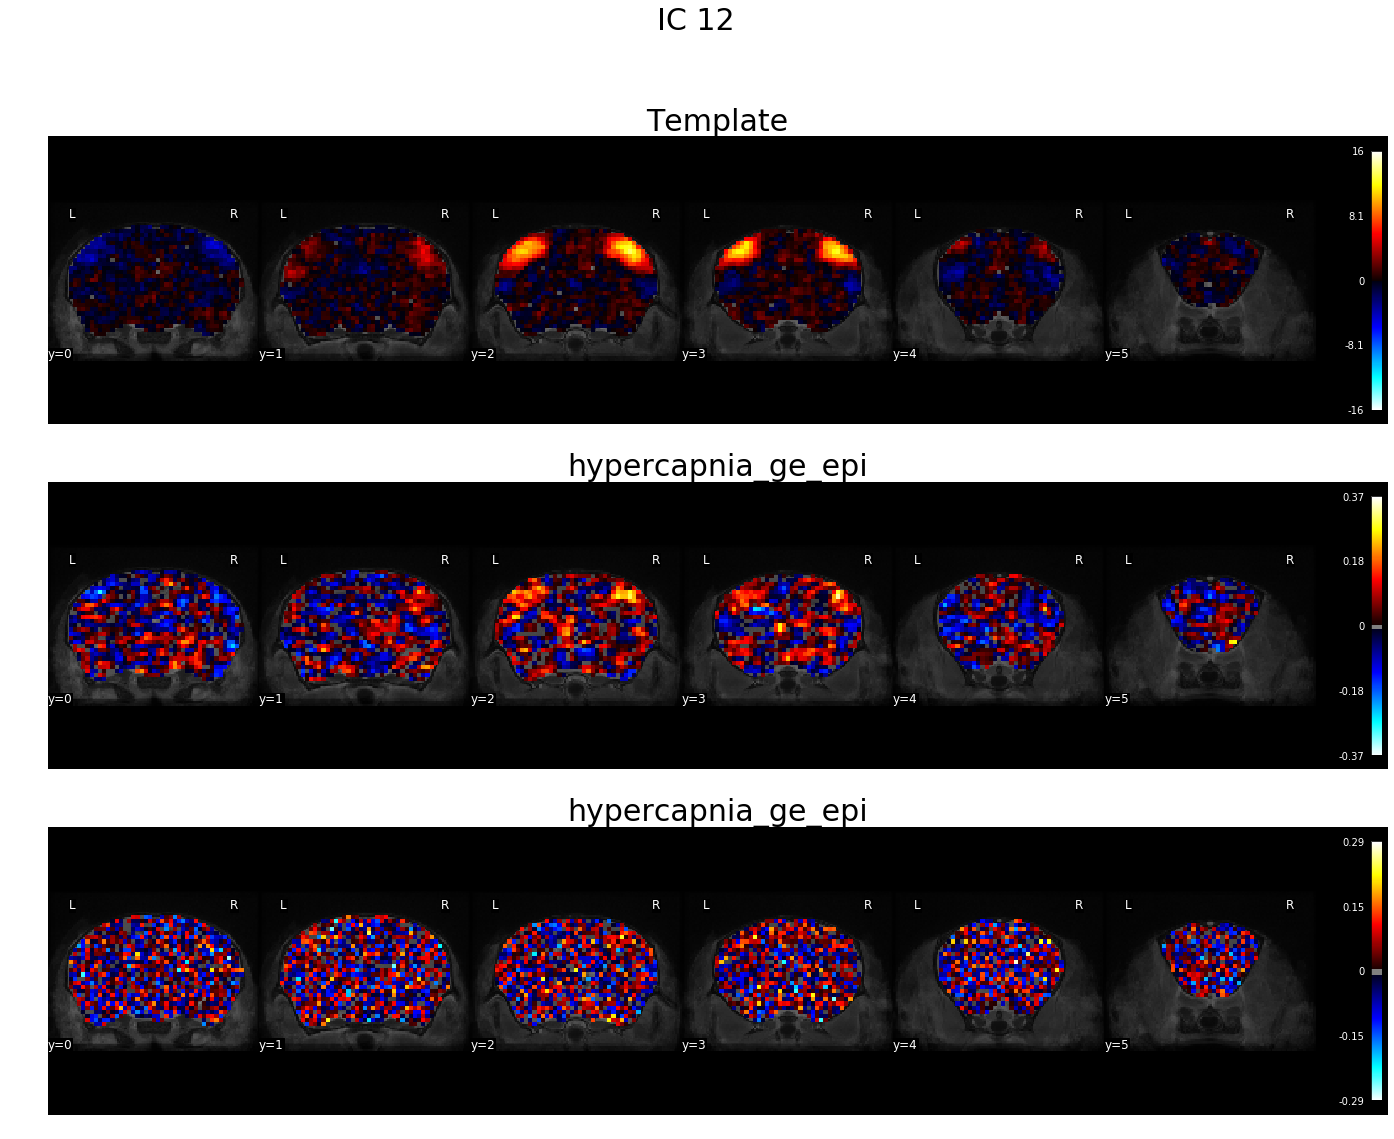

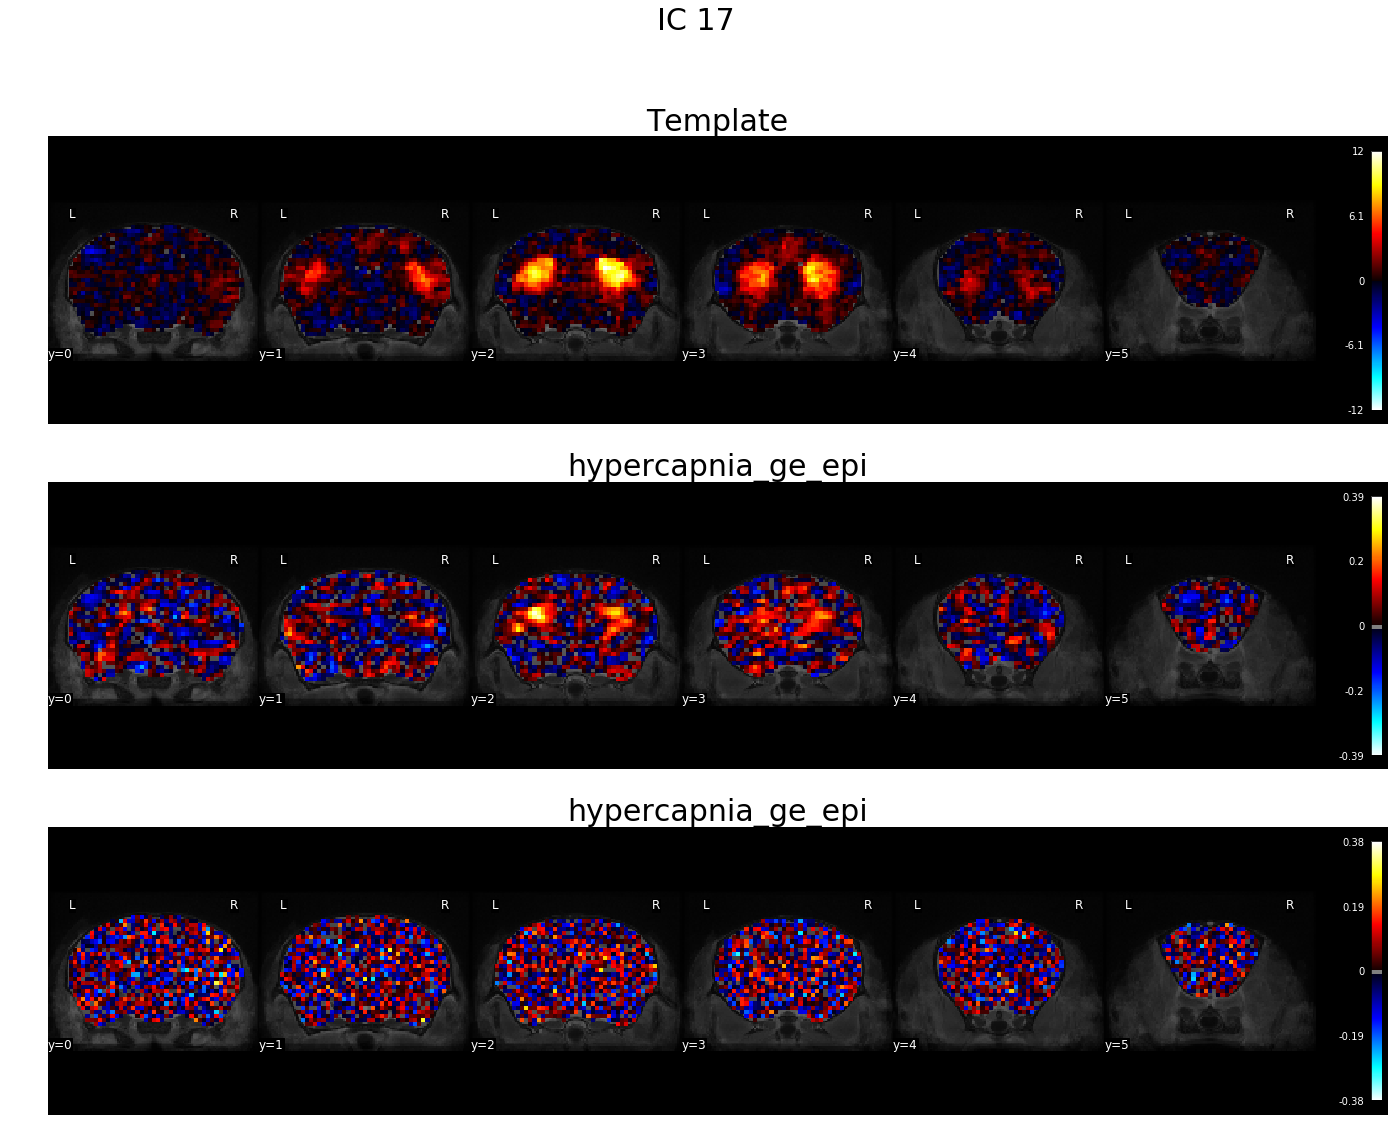

In [33]:
%matplotlib inline
from nilearn.plotting import plot_stat_map
groups=metadata['groups']
mask_file=metadata['mask_file']

for IC in IC_list:
    fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(24,6*3))
    fig.suptitle('IC %s' % (str(IC+1)), fontsize=30)
    
    ax=axes[0]
    plot_stat_map(analysis_functions.recover_3D(mask_file, all_IC_vectors[IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('Template', fontsize=30)
    
    ax=axes[1]
    plot_stat_map(analysis_functions.recover_3D(mask_file, all_sub_ICs[group][sub][IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('%s' % (group), fontsize=30)
    
    ax=axes[2]
    plot_stat_map(analysis_functions.recover_3D(mask_file, shuffled_sub_ICs[group][sub][IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('%s' % (group), fontsize=30)
    

### When looking at group averages, we can see that the ICA components can be found in the group averages even in complete noise. For each IC, the first map is the template, the second the real data, adn the third the shuffled data.

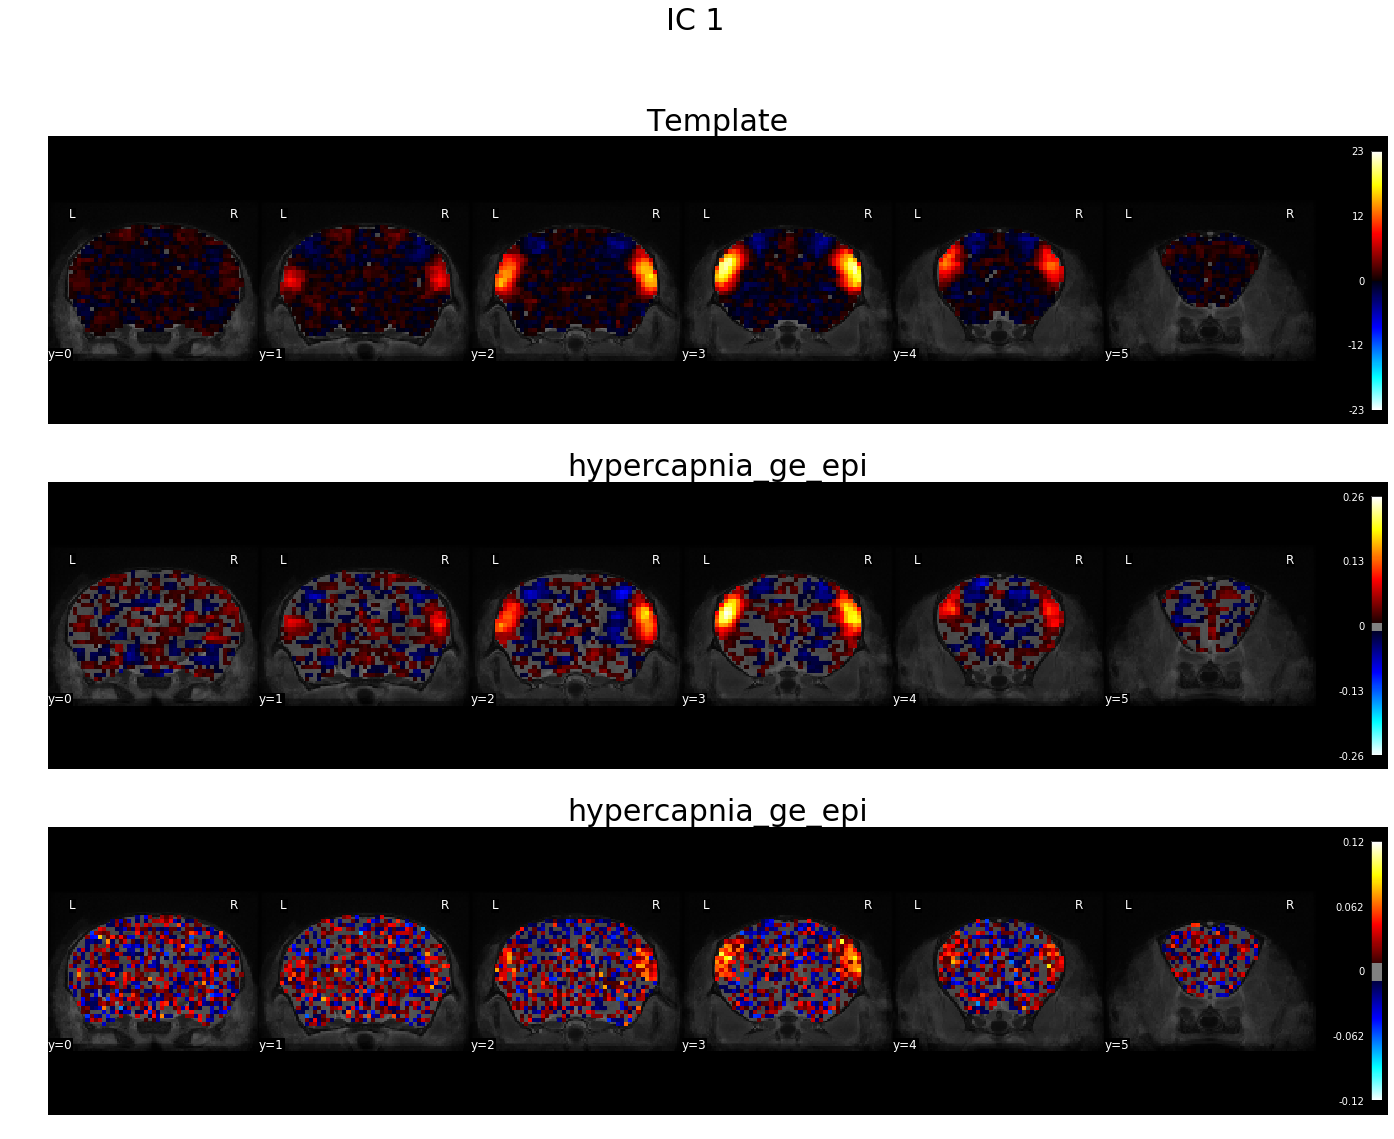

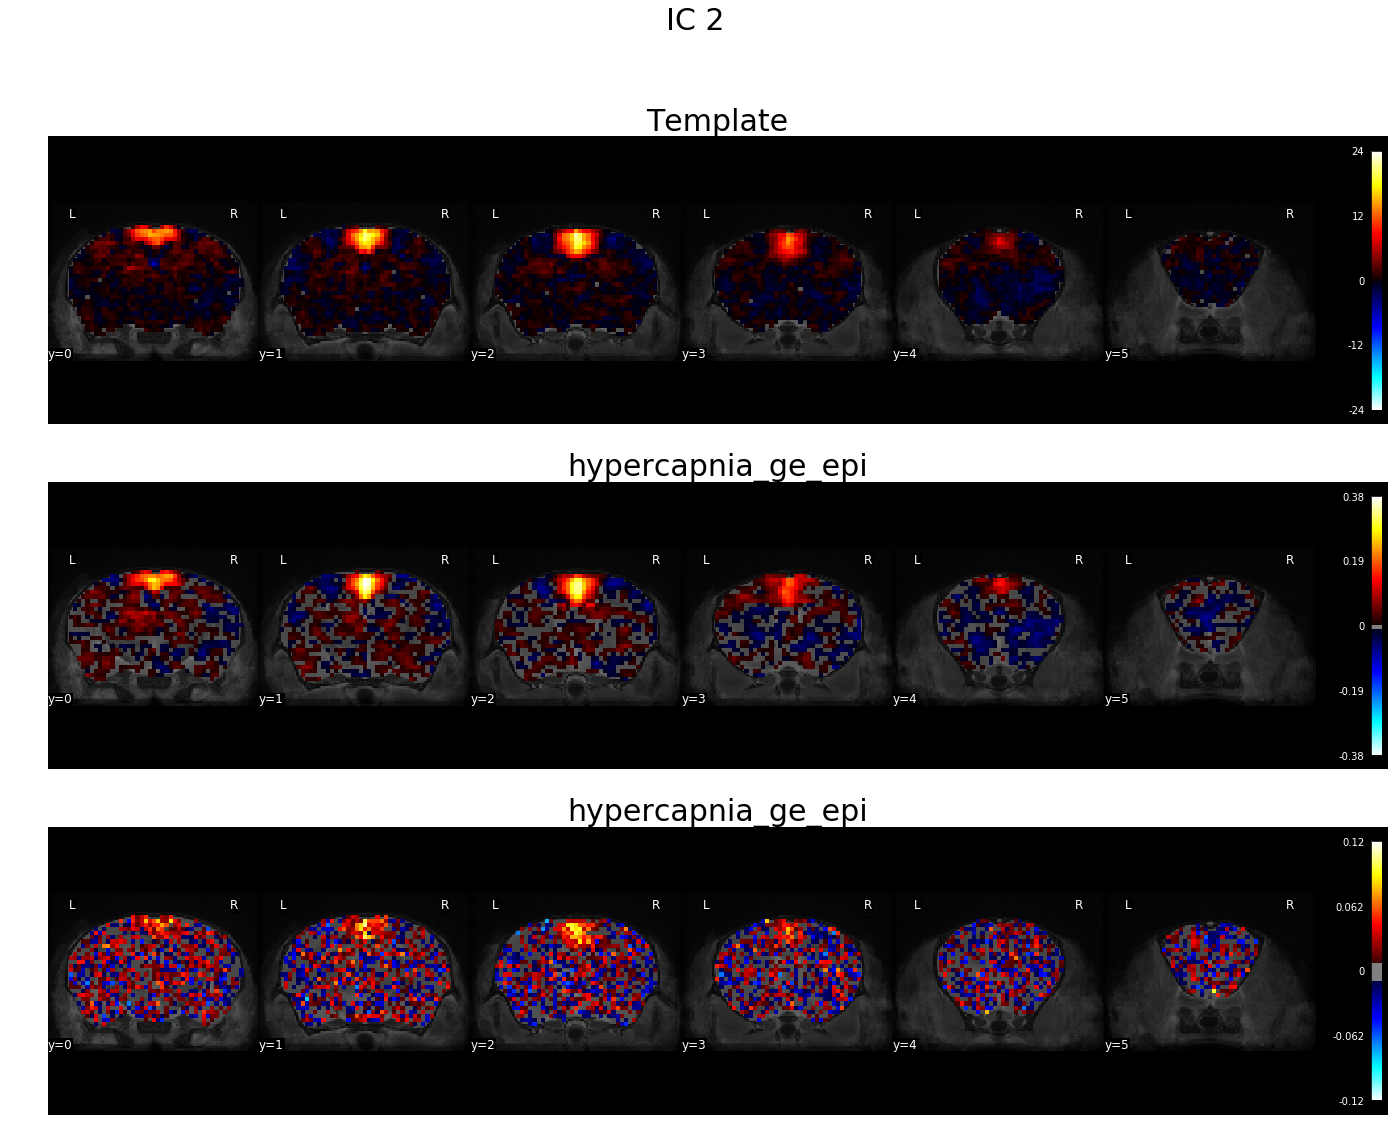

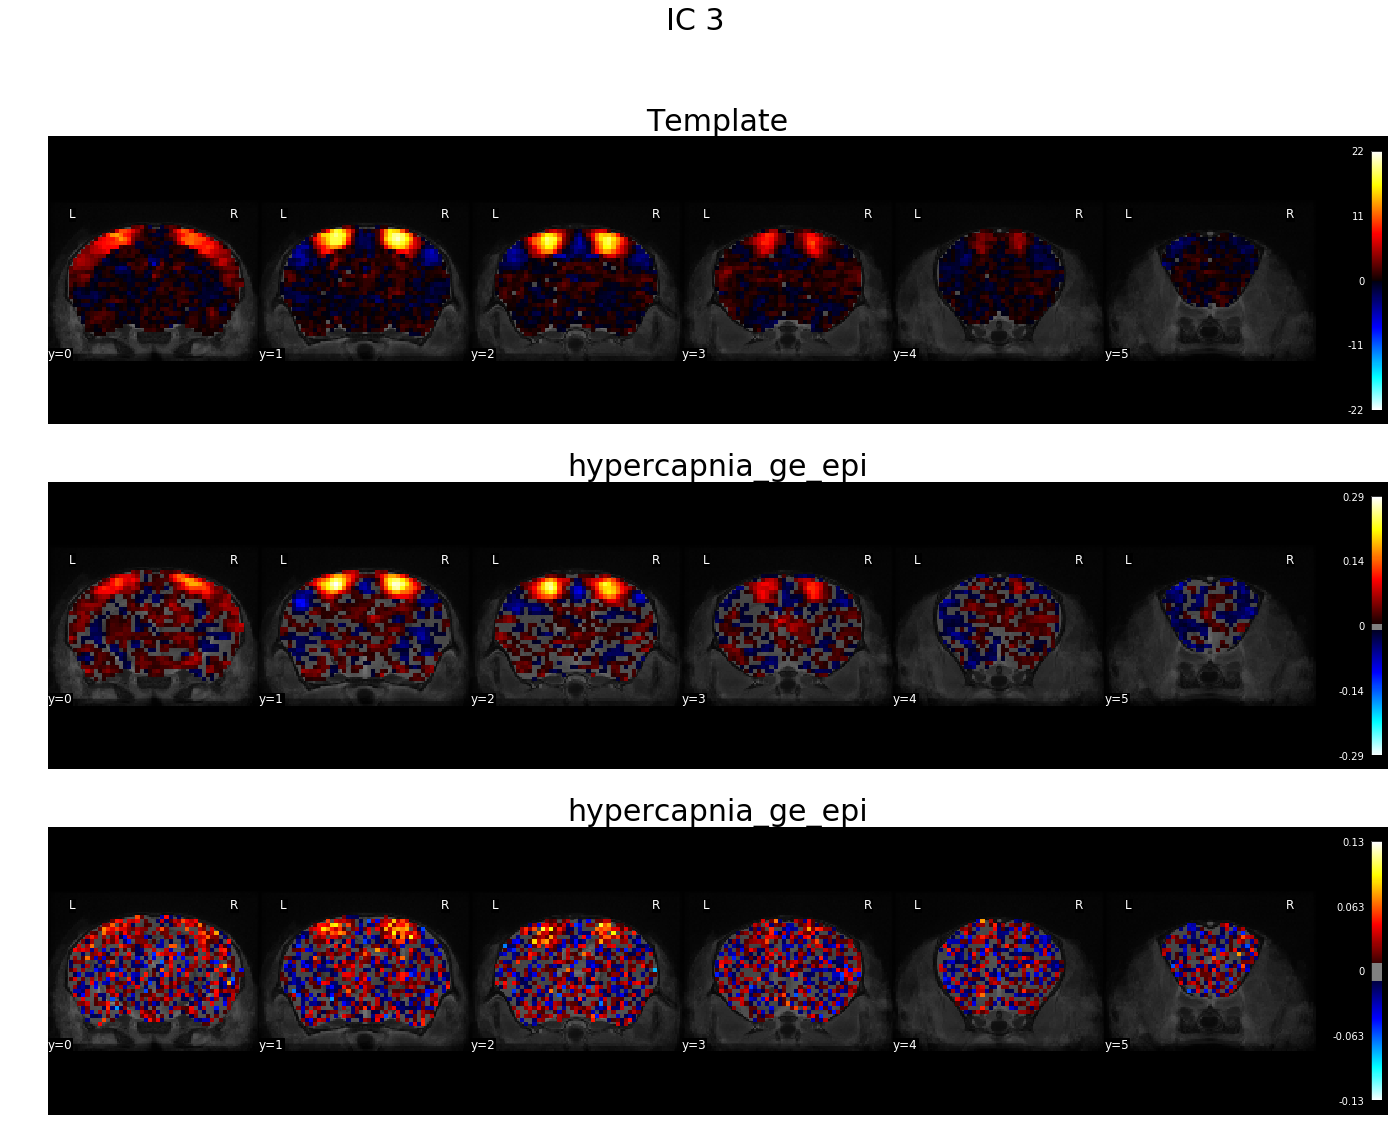

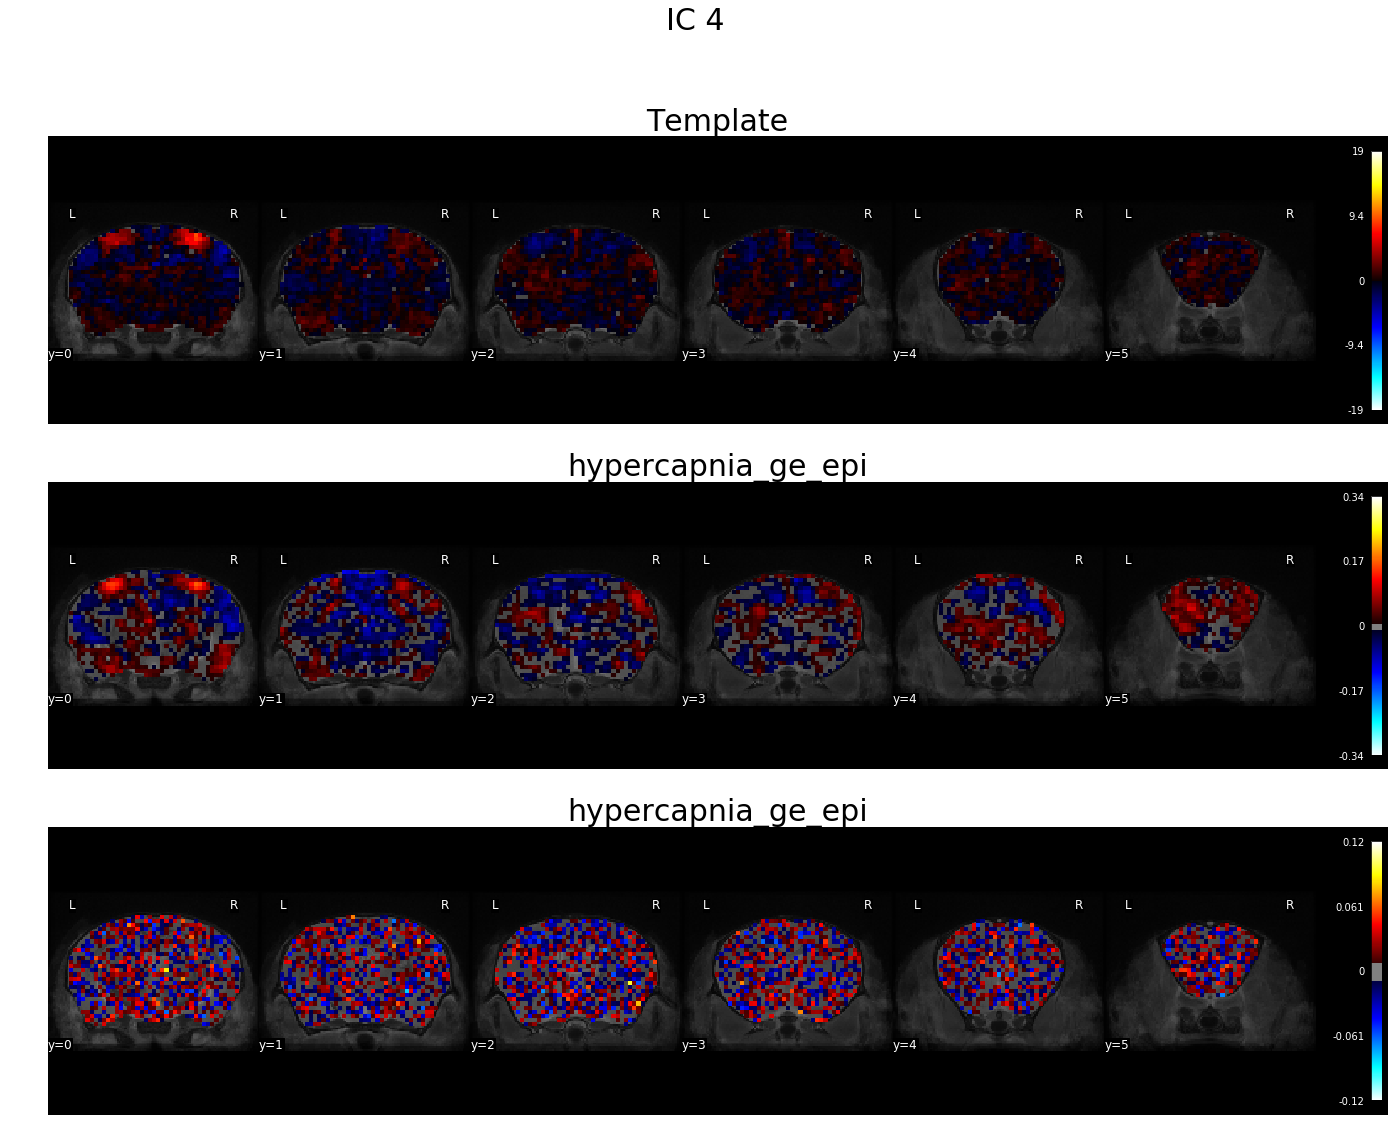

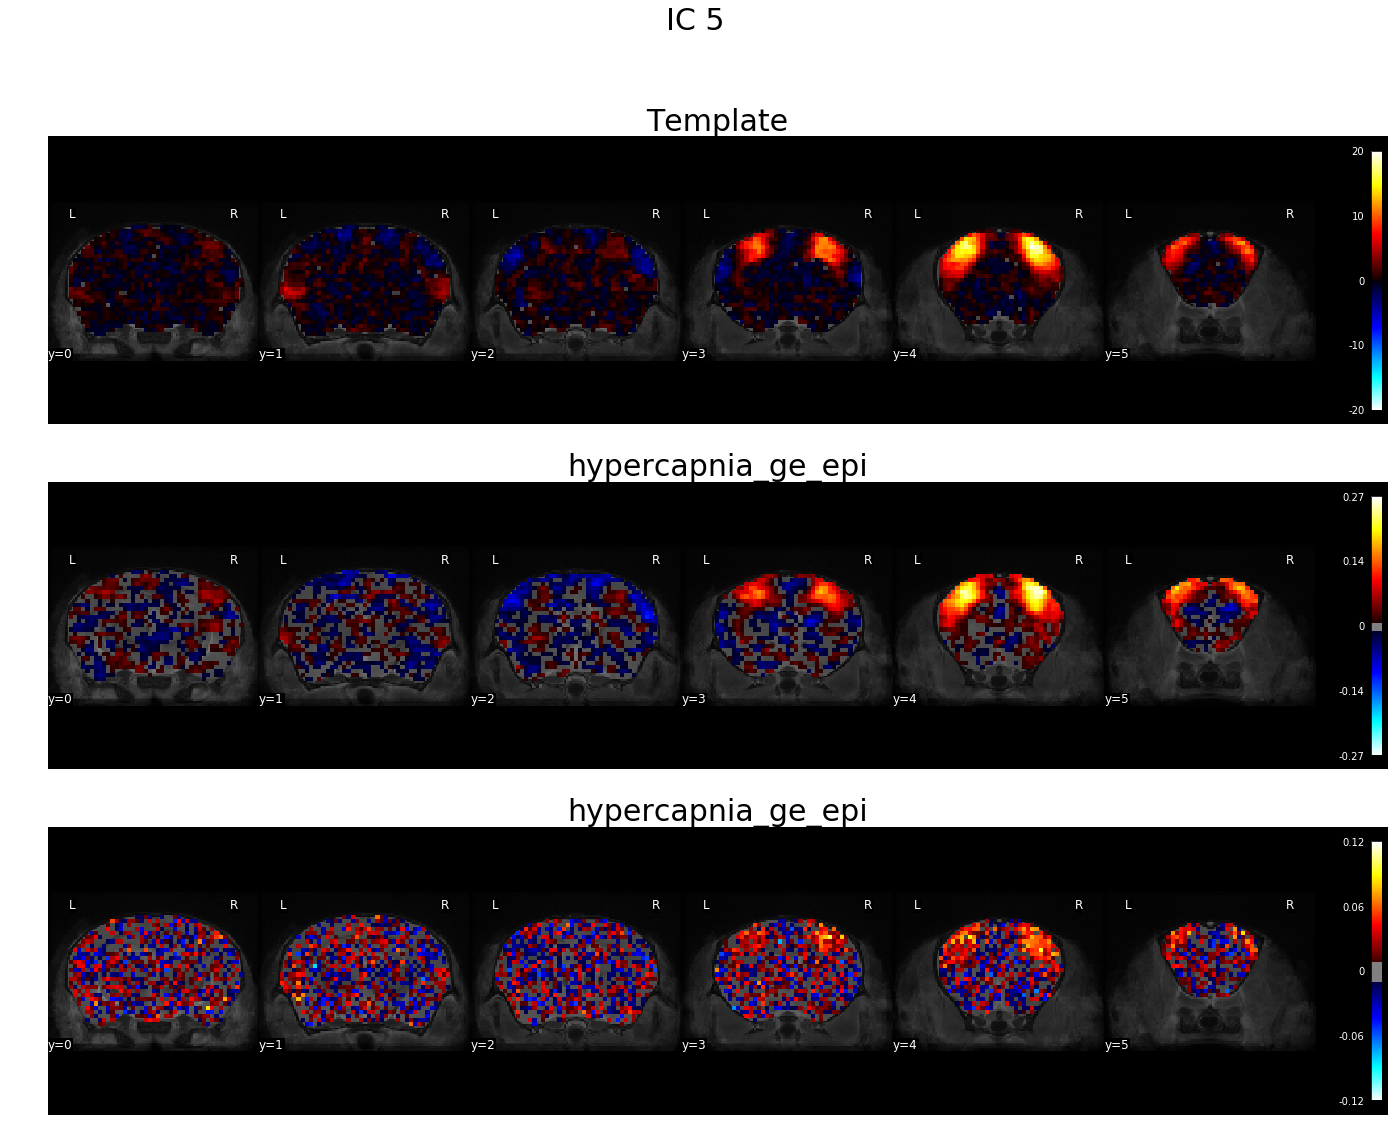

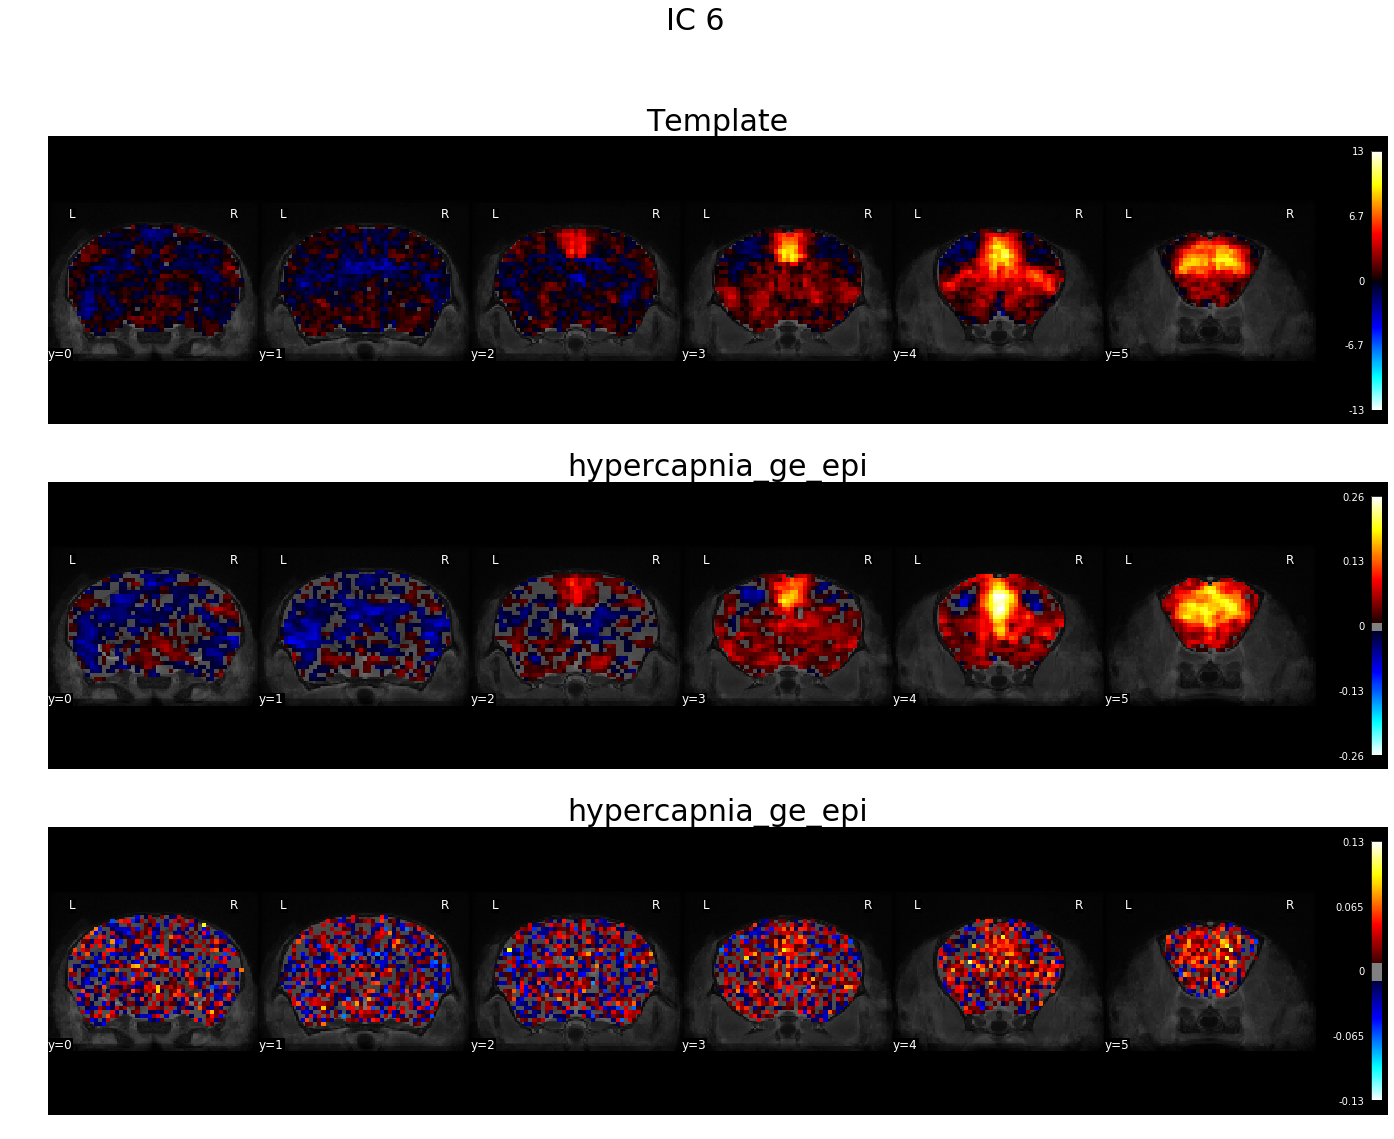

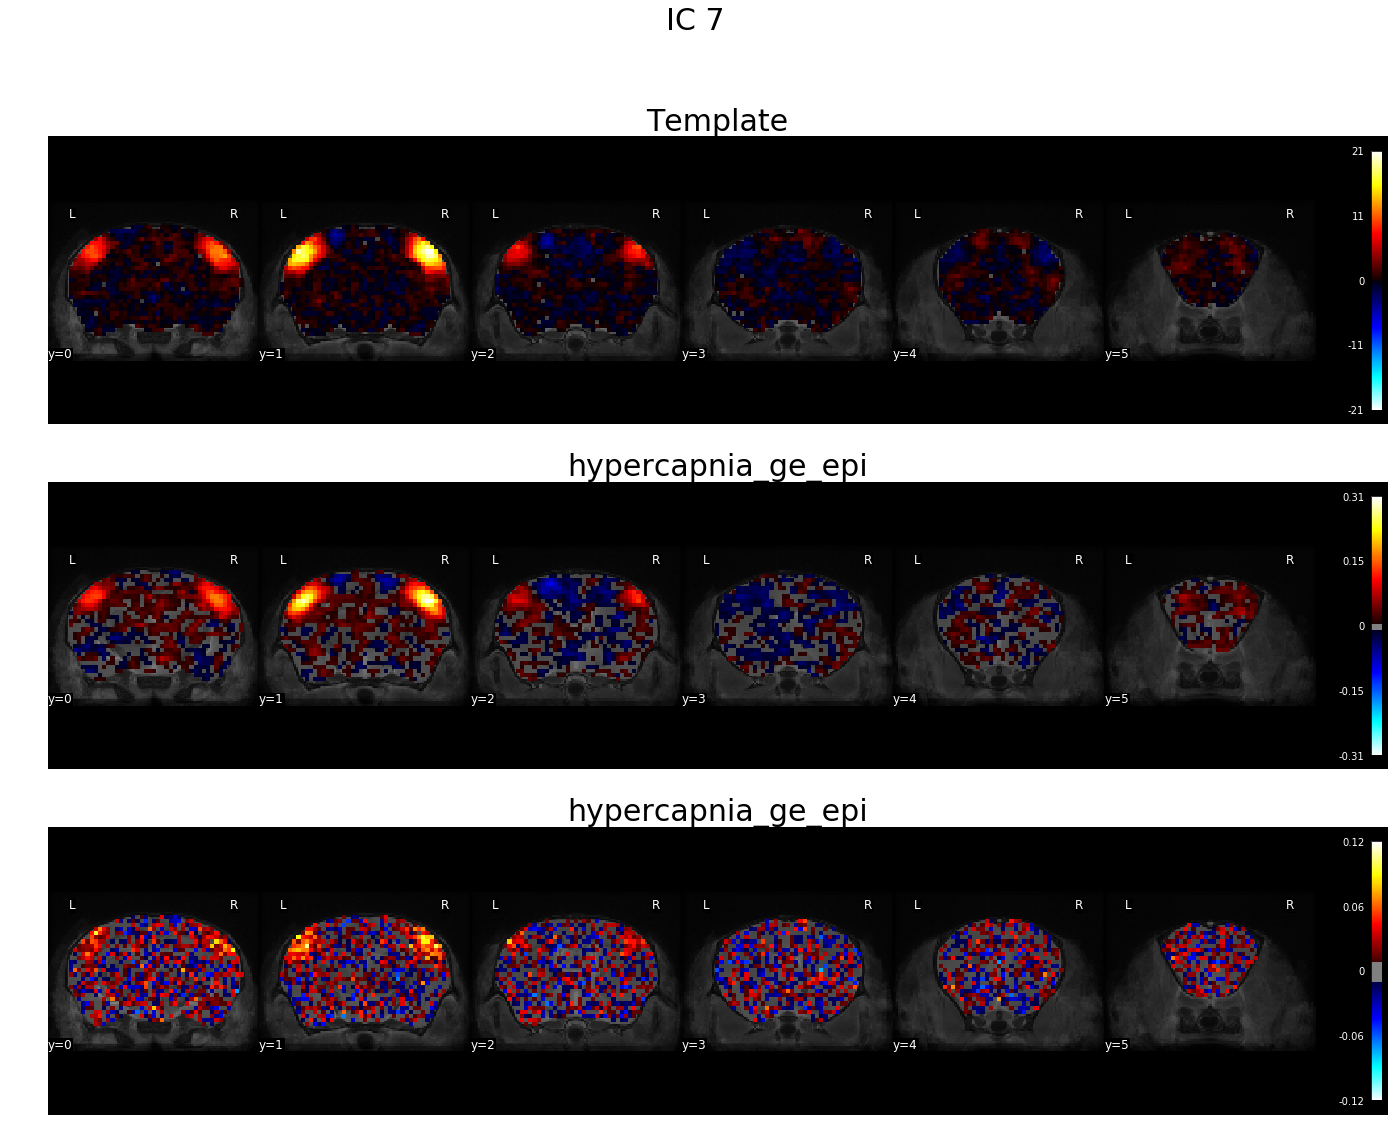

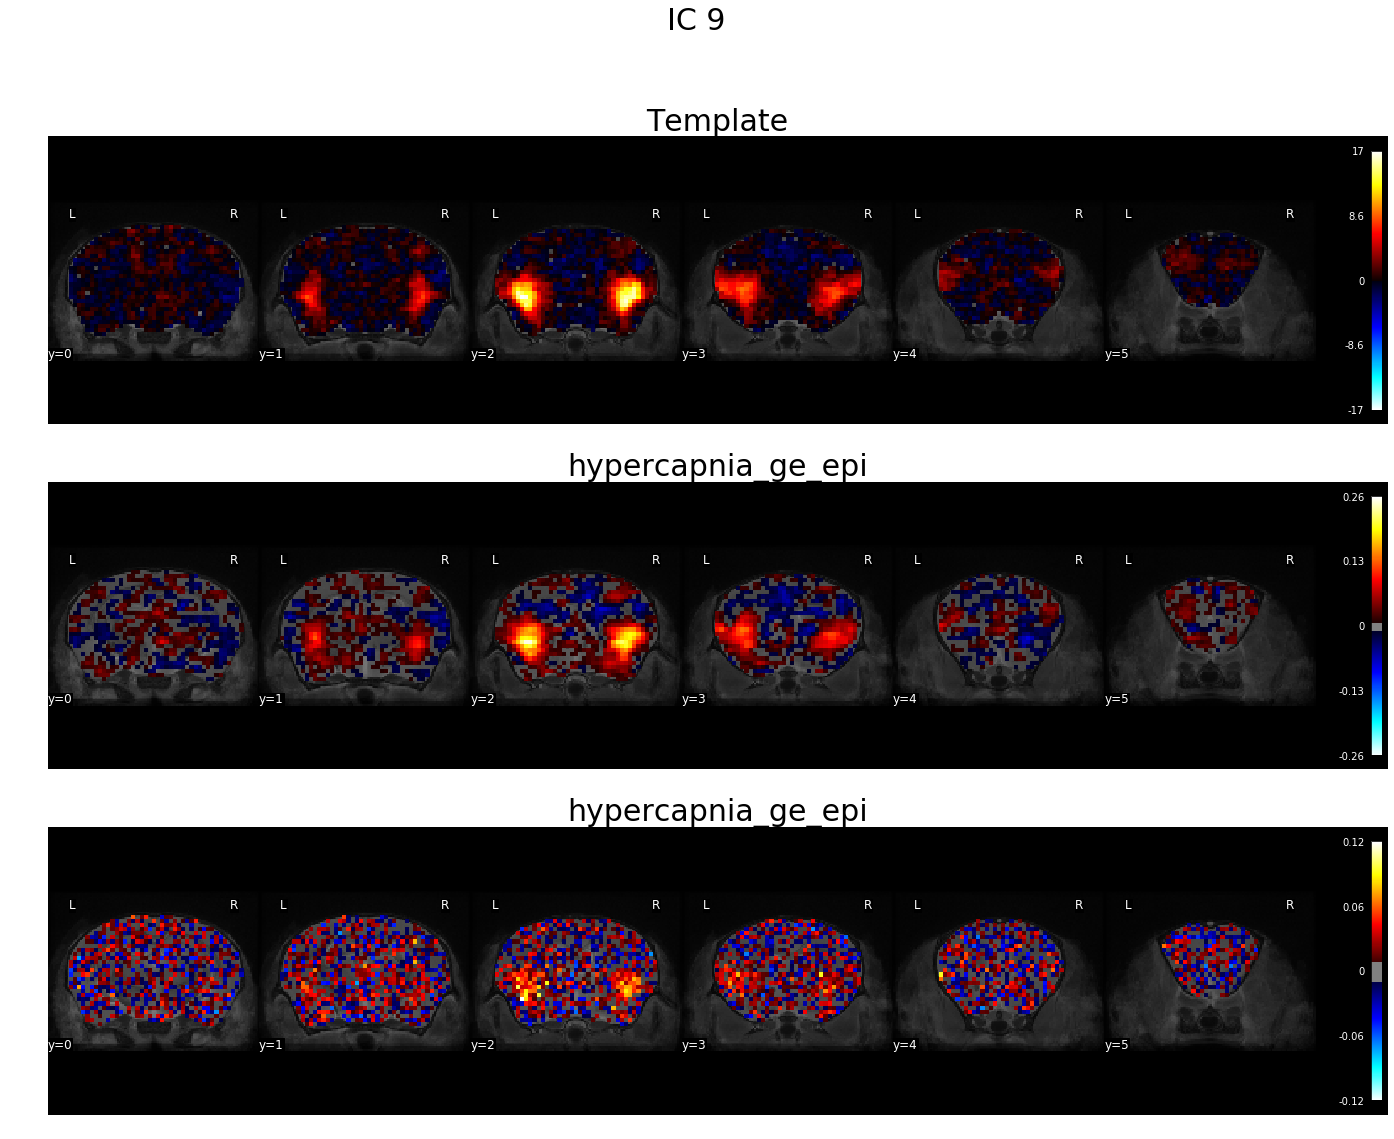

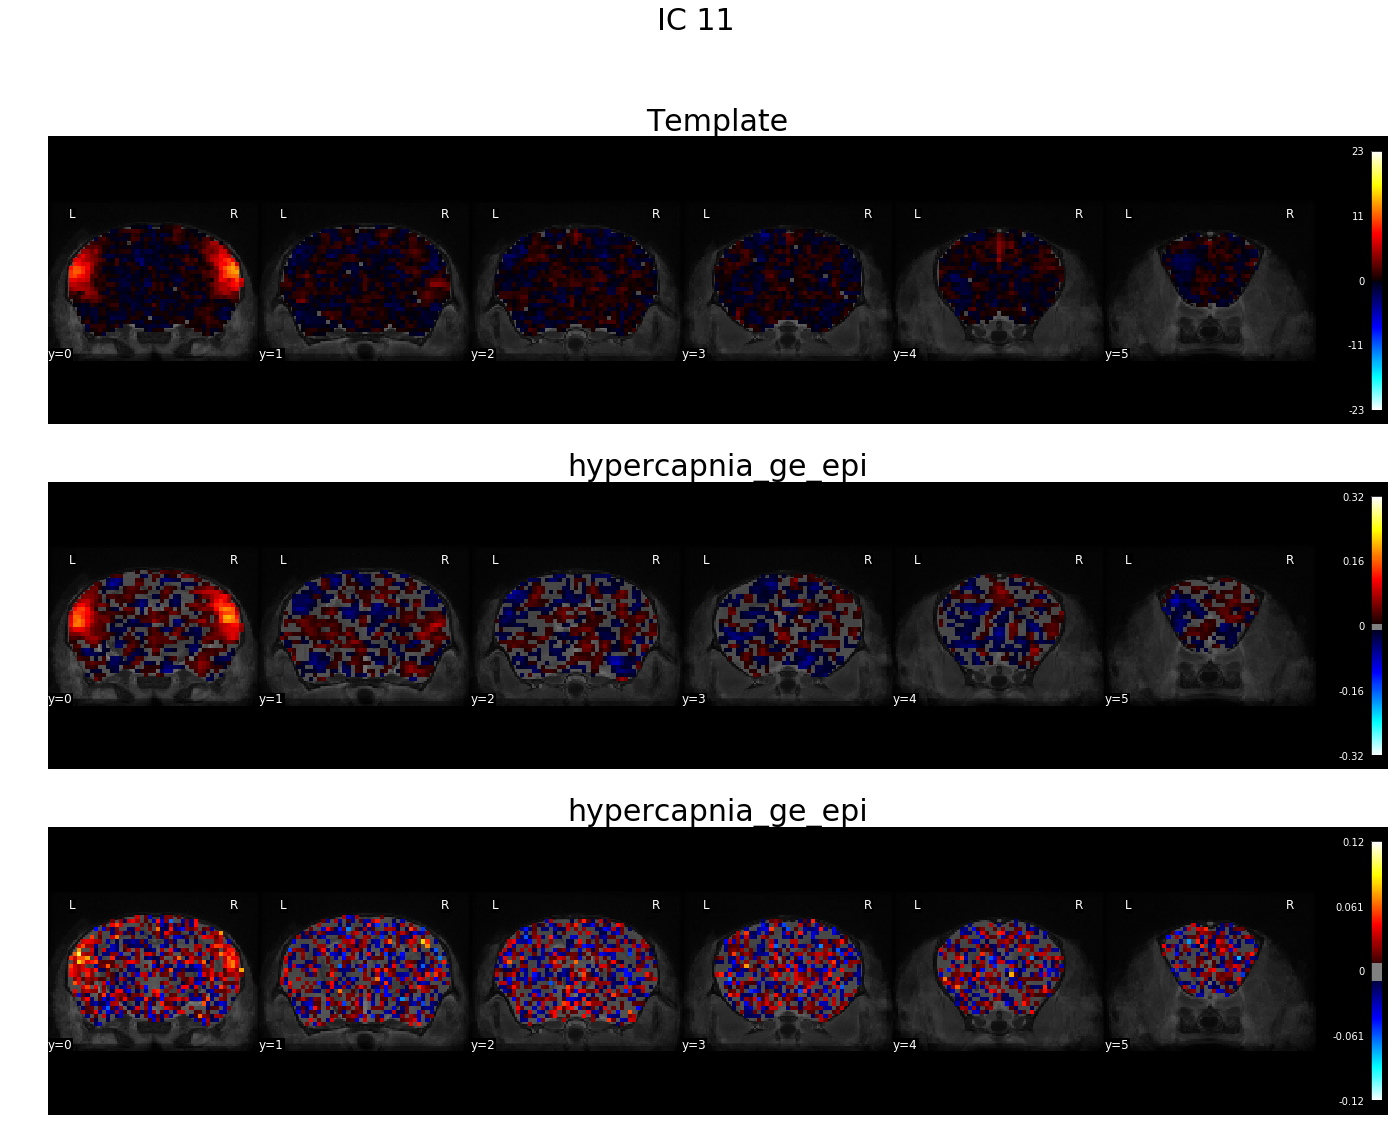

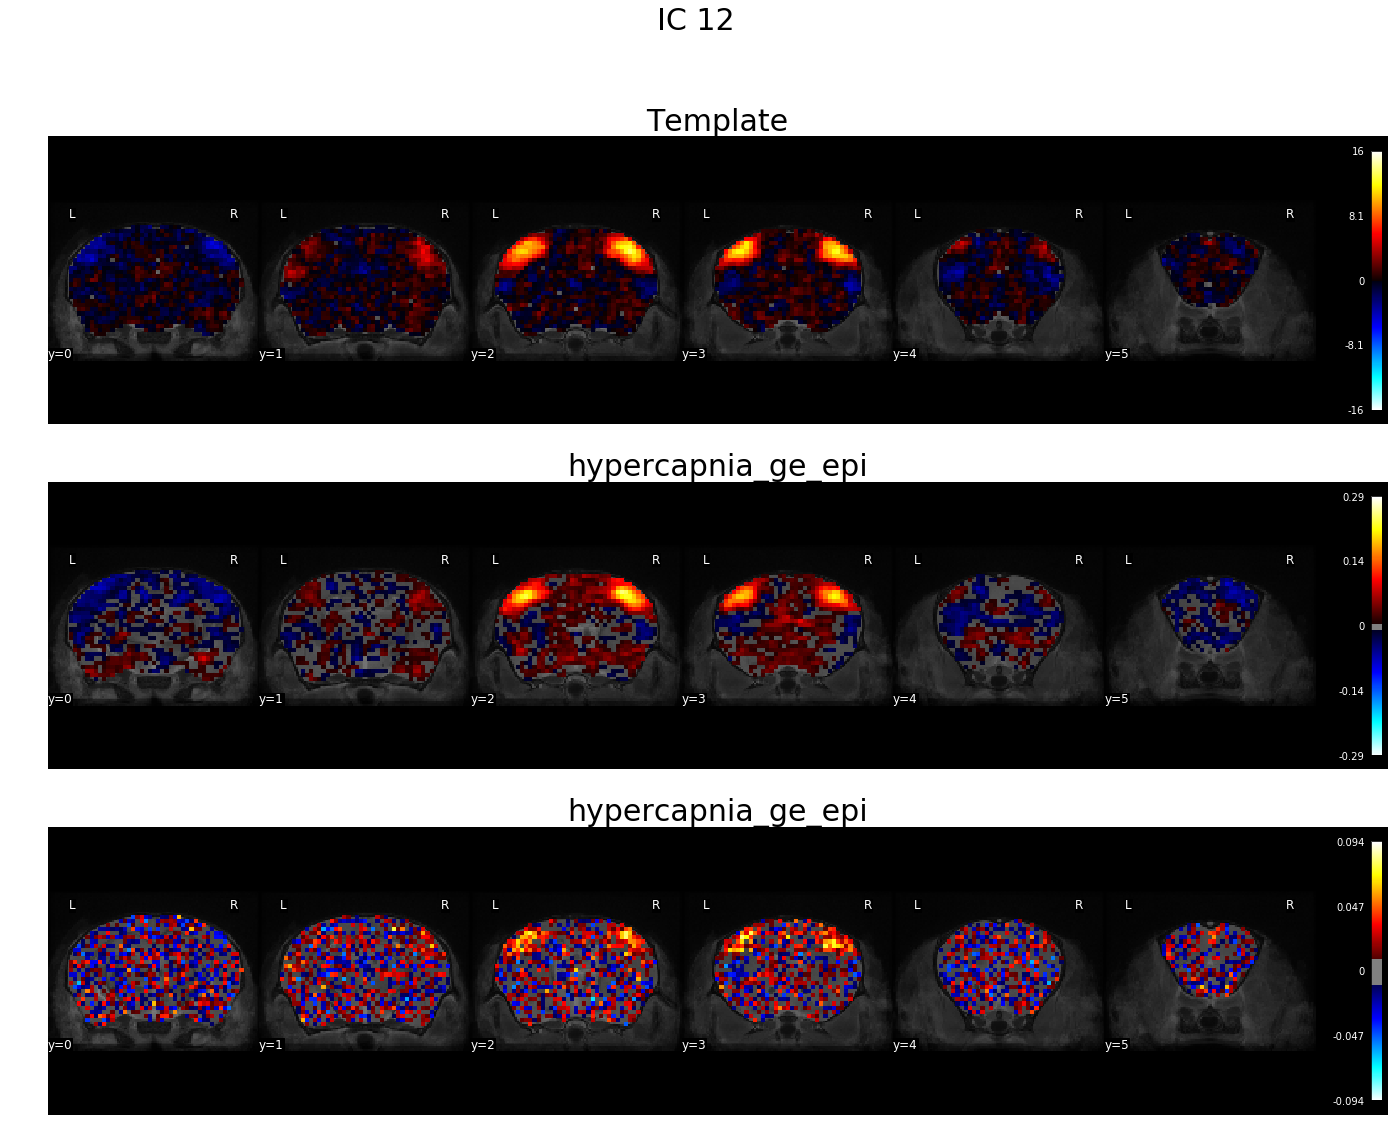

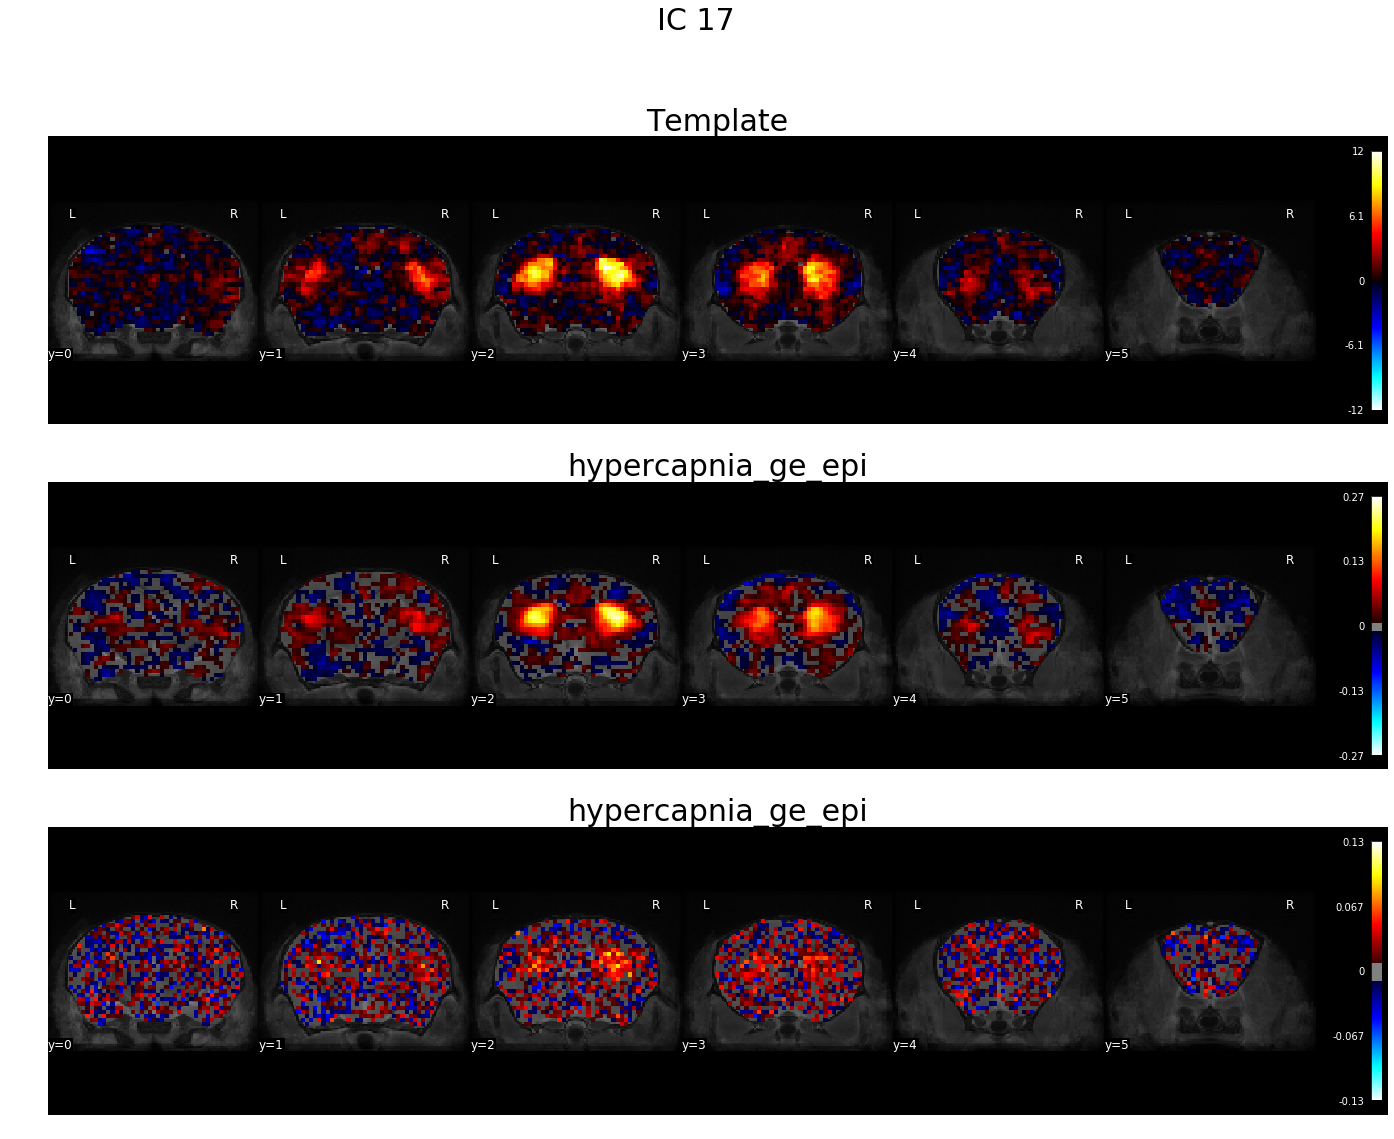

In [28]:
%matplotlib inline
from nilearn.plotting import plot_stat_map
groups=metadata['groups']
mask_file=metadata['mask_file']

brain_mask=np.asarray(nb.load(mask_file).dataobj)
volume_indices=brain_mask.astype(bool)

for IC in IC_list:
    fig,axes = plt.subplots(nrows=3, ncols=1,figsize=(24,6*3))
    fig.suptitle('IC %s' % (str(IC+1)), fontsize=30)
    
    ax=axes[0]
    plot_stat_map(analysis_functions.recover_3D(mask_file, all_IC_vectors[IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('Template', fontsize=30)
    
    ax=axes[1]
    group_average=[]
    for sub in group_subs[group]:
        group_average.append(all_sub_ICs[group][sub])
    group_average=np.array(group_average).mean(axis=0)
    plot_stat_map(analysis_functions.recover_3D(mask_file, group_average[IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('%s' % (group), fontsize=30)
    
    ax=axes[2]
    group_average=[]
    for sub in group_subs[group]:
        group_average.append(shuffled_sub_ICs[group][sub])
    group_average=np.array(group_average).mean(axis=0)
    plot_stat_map(analysis_functions.recover_3D(mask_file, group_average[IC,:]),bg_img='DSURQE.nii.gz', axes=ax, threshold=0.01, cut_coords=(0,1,2,3,4,5), display_mode='y')
    ax.set_title('%s' % (group), fontsize=30)
    